#### Setup

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm 
# from iterools import Counter
from qumcmc import *
from collections import Counter

In [55]:
def convergence_data_plot(DATA, nspins:int,to_check:str= 'kldiv', init:int =1):
    df_cl = pd.DataFrame(); df_q = pd.DataFrame()
    for i in range(init, DATA.shape[1]+1):
        df_cl[i] = DATA[i]['classical'][to_check]
        df_q[i] = DATA[i]['quantum'][to_check]

    plt.figure(figsize=(10,8))
    plt.plot(df_cl.mean(axis=1), label = 'Classical Uniform')
    plt.fill_between(range(df_cl.shape[0]),y1=df_cl.mean(axis=1)-0.5*df_cl.std(axis=1),y2=df_cl.mean(axis=1)+0.5*df_cl.std(axis=1), alpha = 0.3)
    plt.plot(df_q.mean(axis=1), label= 'Quantum Enhanced')
    plt.fill_between(range(df_q.shape[0]),y1=df_q.mean(axis=1)-0.5*df_q.std(axis=1),y2=df_q.mean(axis=1)+0.5*df_q.std(axis=1), alpha = 0.4)
    plt.xlabel("MCMC Iterations")
    plt.ylabel("KL Divergence")
    plt.yscale('log')
    plt.title('MCMC Analytics: Convergence of KL Div. |'+ ' nspins : '+ str(nspins))
    # plt.grid()
    plt.legend()
    plt.show()

def acceptance_prob_hist(DATA, nspins: int, init:int= 1, trunc:int = -12):

    classical_acp = []; quantum_acp = []
    for i in tqdm(range(init, DATA.shape[1]+1)):
        classical_acp += DATA[i]['classical']['acceptance_prob']
        quantum_acp += DATA[i]['quantum']['acceptance_prob']
    quantum_acp = np.array(quantum_acp); classical_acp = np.array(classical_acp)
    
    
    plt.figure(figsize=(10,10))
    
    
    result = np.where(quantum_acp > 10**(trunc), quantum_acp, trunc)  ### introduce truncation for numerics 
    plt.hist(np.log10(result, out=result, where=result > 0),label= 'Quantum Enhanced' , alpha= 0.8, bins= 25)
    
    result = np.where(classical_acp > 10**(trunc), classical_acp, trunc)   ### introduce truncation for numerics 
    plt.hist(np.log10(result, out=result, where=result > 0),label= 'Classical Uniform' ,alpha= 0.5, bins= 25)

    plt.xlabel("Acceptance Probabilities | scale: log10")
    plt.title('MCMC Analytics: Comparison of Accp. Probabilities |'+ ' nspins : '+ str(nspins))
    plt.legend()
    # plt.grid()
    # plt.show()
    return

In [56]:
sns.set_theme(context = 'paper')
sns.set_style('ticks')

### **5 qubit**

In [57]:
DATA5 = pd.read_json('SamplingData/DATA_5qubit.json')

#### KL Div

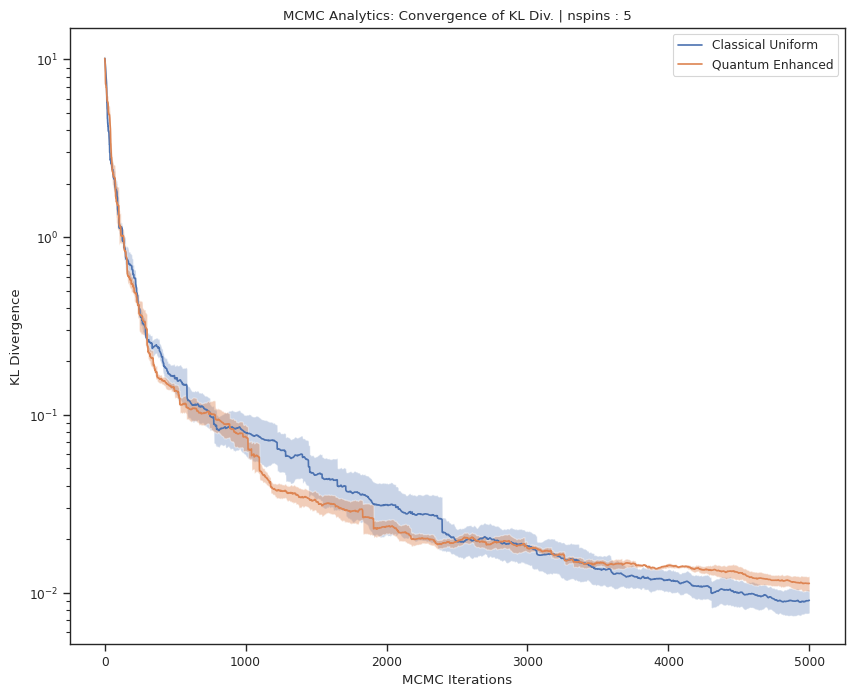

In [58]:
convergence_data_plot(DATA5, to_check='kldiv', nspins= 5)

#### Acceptance Prob

100%|██████████| 5/5 [00:00<00:00, 10683.40it/s]


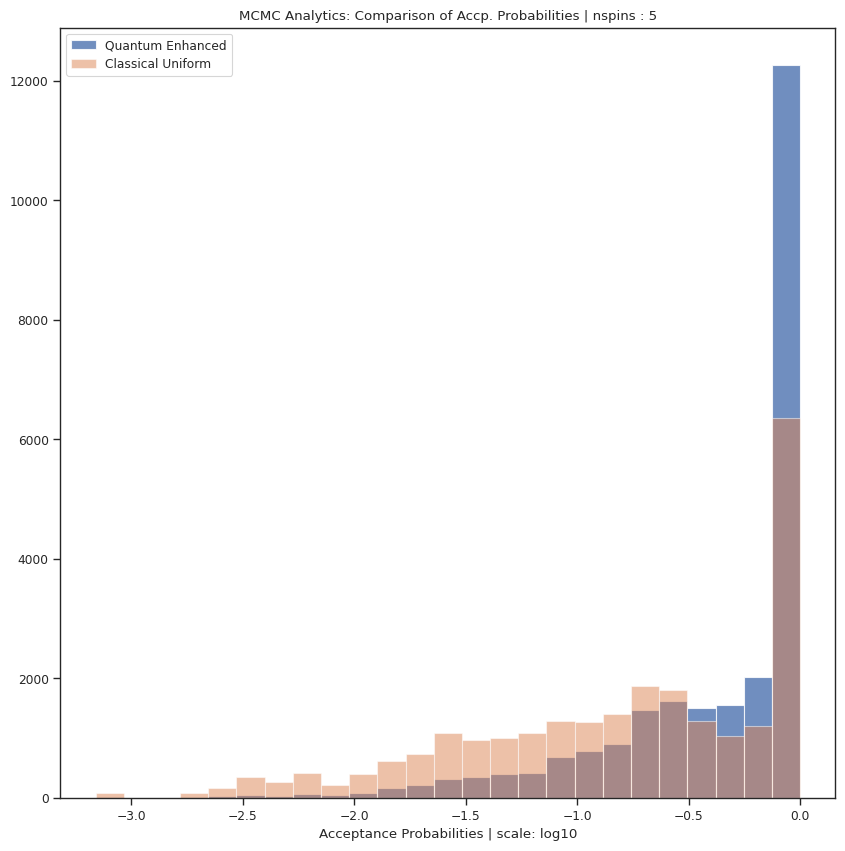

In [59]:
acceptance_prob_hist(DATA5, nspins=5)

### **10 Qubits**

In [60]:
DATA10 = pd.read_json('SamplingData/DATA_10qubit.json')

#### KL Div

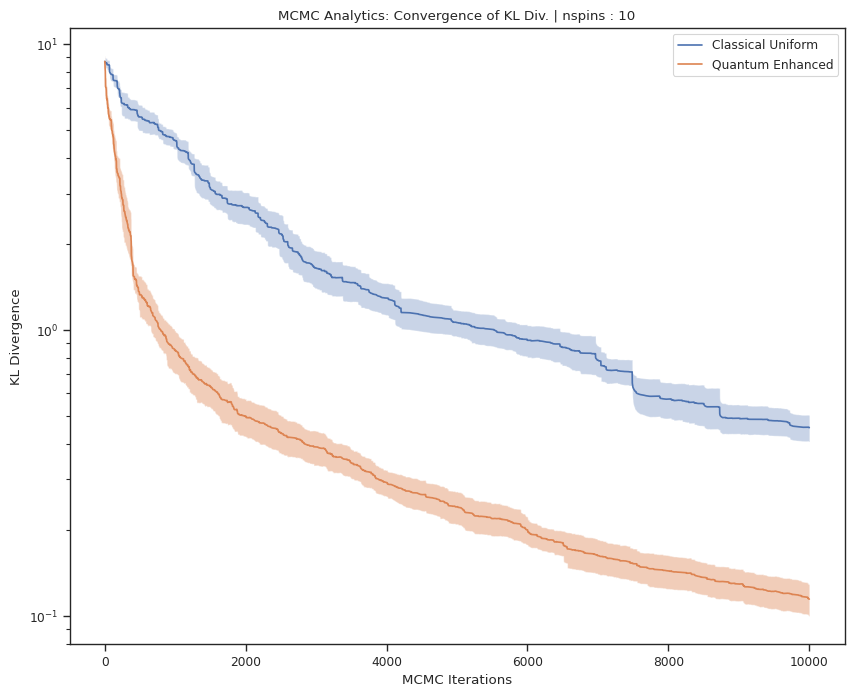

In [61]:
convergence_data_plot(DATA10, to_check= 'kldiv', nspins=10)

100%|██████████| 5/5 [00:00<00:00, 5550.96it/s]


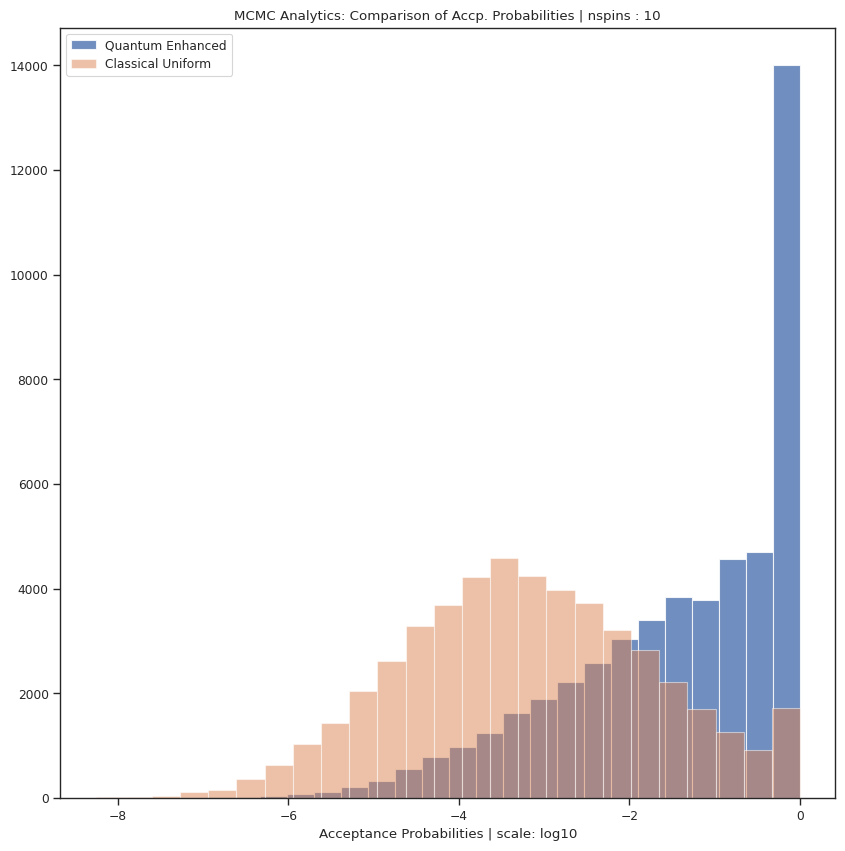

In [62]:
acceptance_prob_hist(DATA10, 10)

### **15 Qubits**

In [63]:
DATA15 = pd.read_json('SamplingData/DATA_15qubit.json')

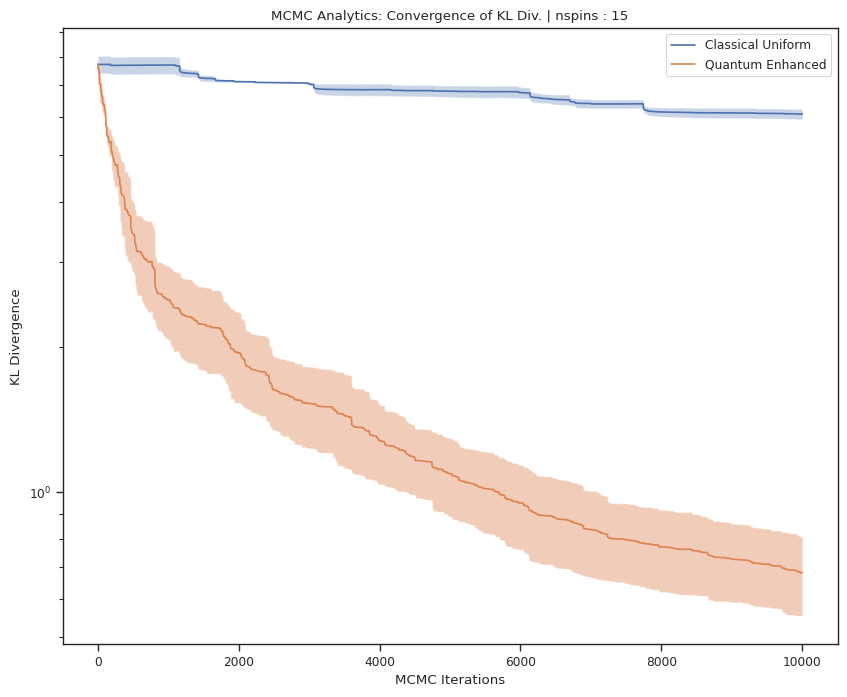

In [64]:
convergence_data_plot(DATA15, to_check= 'kldiv', nspins=15, init= 2)

100%|██████████| 3/3 [00:00<00:00, 2104.87it/s]


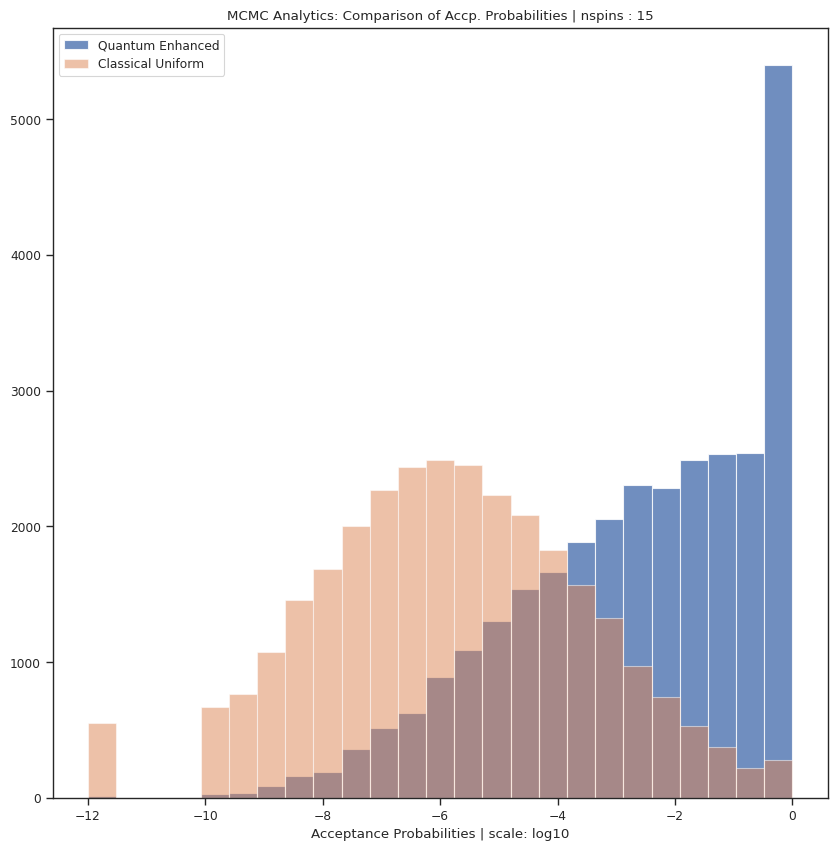

In [65]:
acceptance_prob_hist(DATA15, nspins= 15, init= 2)

### **Plots for Paper**

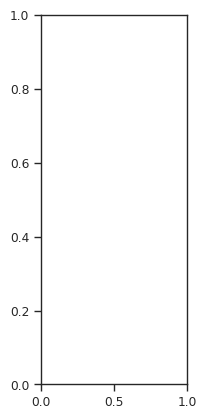

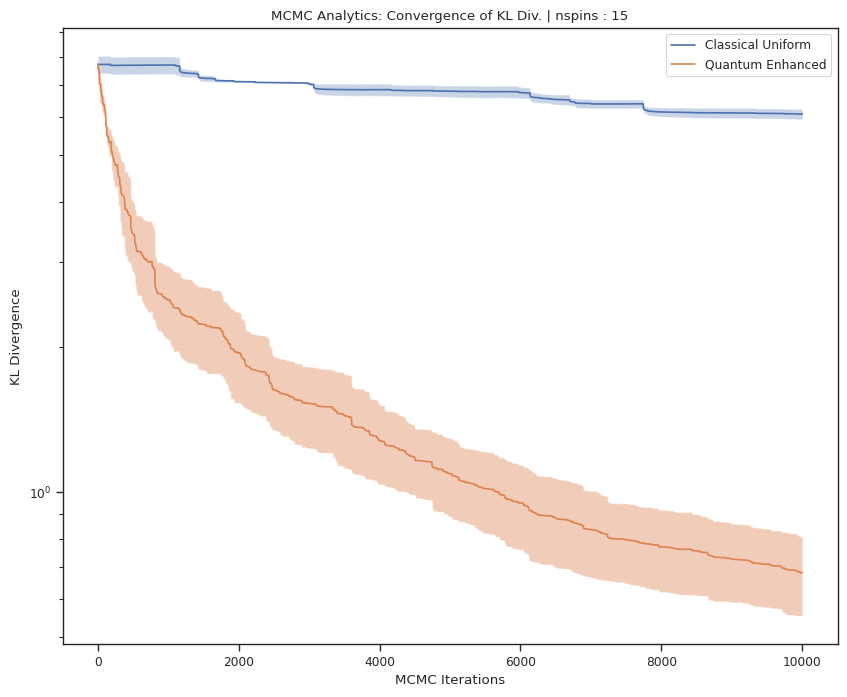

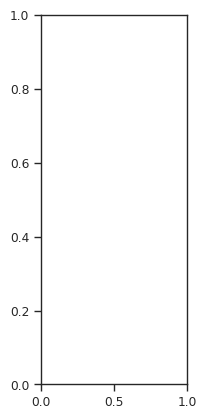

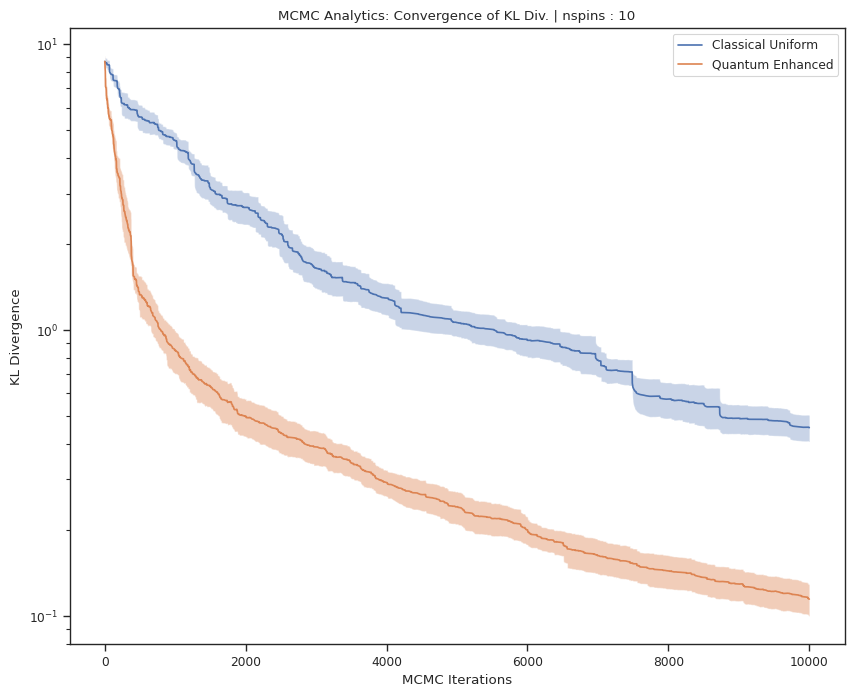

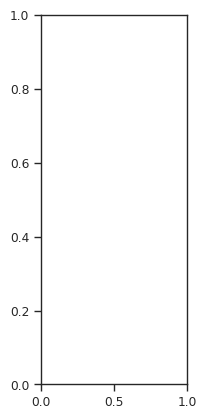

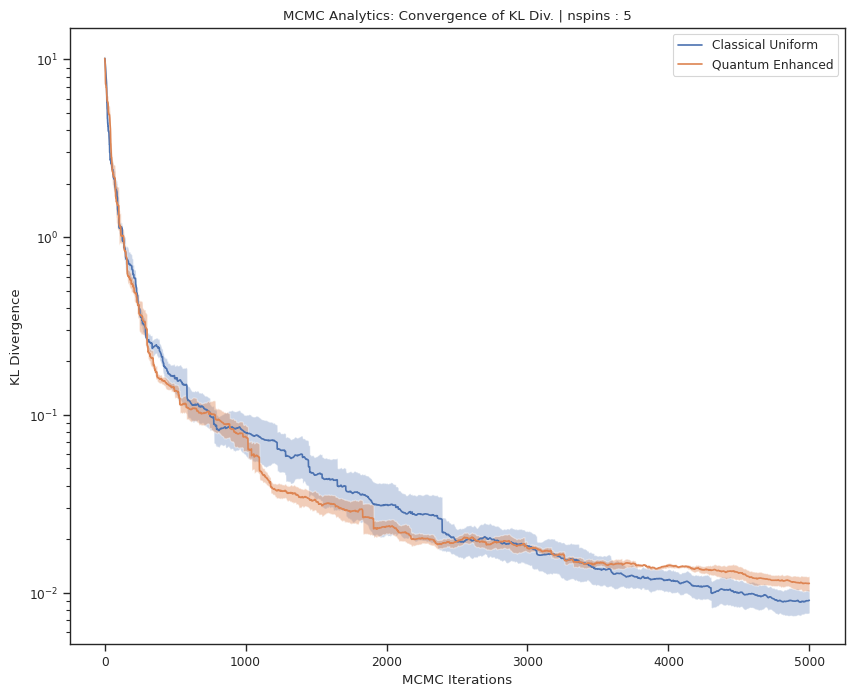

In [66]:
plt.subplot(1,3,3)
convergence_data_plot(DATA15, to_check= 'kldiv', nspins=15, init= 2)
plt.subplot(1,3,2)
convergence_data_plot(DATA10, to_check= 'kldiv', nspins=10, init= 1)
plt.subplot(1,3,1)
convergence_data_plot(DATA5, to_check= 'kldiv', nspins=5, init= 1)
